# Regression Notebook - House Prices

In this notebook we'll practice working with `pandas` `DataFrames` and train a linear regression model to predict house prices.

Fill in the cells provided marked `TODO` with code to answer the questions. Answers should do the computation stated rather than writing in hard-coded values. So for example, if a problem asks you to compute the average age of people in a dataset, you should be writing Python code in this notebook to do the computation instead of plugging it into some calculator and saving the hard-coded answer in the variable. In other words, we should be able to run your code on a smaller/larger dataset and get correct answers for those datasets with your code.

It is generally a good idea to restart the kernel and run all cells (especially before turning it in) to make sure your code runs correctly from start to finish.

In [9]:
# Conventionally people rename the pandas import to pd for brevity
import pandas as pd

In [10]:
# Load in the data and preview it
sales = pd.read_csv('home_data.csv') 
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---
# Exploring the data.
This question asks you to explore the dataset we will be using. Answer the following three sentences by writing code to compute the dsecribed values in the given variables names. Note that Q1 has 3 sub-questions.

## Q1) Exploring the data

1. Lets start by looking at the dataframe column names.
2. How many houses do we have in our data set? This should correspond to the number of rows in the dataset. Save the number of rows in a variable called `num_rows`.
3. Which column are we trying to predict given the other features (i.e. what's our output `y`)? Save the column values in a variable called `y`.
4. How many inputs do we have in total in the data set (i.e. what is the size of our input `x`)? Save the number of inputs in a variable called `num_inputs`. Lets use the `shape` built in function. 

Each one of these questions should be answered in the next cells respectively.

*Hint:* You can use `len()` to get the length of anything in Python. Note that when you use it on a DataFrame, it will give you the number of rows, not columns.


In [11]:
# 

sales.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
# lets start by looking at the column names 

list(sales.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [14]:
# now the number of rows 

num_rows= sales.shape[0]

print('number of rows is {}'.format(num_rows))


#what about the number of columns 




number of rows is 21613


In [5]:
# now we will define the y varriable 

y= sales.price

y.head(5)

0    221900
1    538000
2    180000
3    604000
4    510000
Name: price, dtype: int64

In [100]:
# okay lets look at the number of 

num_inputs= sales.shape[1] - 2

print('the number of inputs would not include y (price) or id... thus the value is {}'.format(num_inputs))

the number of inputs would not include y (price) or id... thus the value is 19


---
## Q2) What is the average price of houses with 3 bedrooms?

Compute the average price of houses in the dataset with 3 bedrooms. Save the result in `avg_price_3_bed`.

In [103]:
### edTest(test_avg_price_3_bed) ###

bed_3 = sales[sales["bedrooms"] == 3]
bed_3.head()

#print(bed_3.bedrooms.min())
#print(bed_3.bedrooms.max())

avg_price_3_bed= bed_3.price.mean()

print('the average price of a three bedroom house is ${:.2f}'.format(avg_price_3_bed))

the average price of a three bedroom house is $466232.08


---
## Q3) What fraction of the properties are have `sqft_living` between 2000-4000?

Compute the fraction of properties with `sqft_living` between 2000 (inclusive) and 4000 (exclusive). Your answer should be stored in `percent_q3` and it should be a number between 0 and 1.
 

In [104]:
### edTest(test_percent_q3) ###

sq_in_2_to_4 = sales[(sales["sqft_living"] >= 2000) &  (sales["sqft_living"] < 4000)]


#print(sq_in_2_to_4.sqft_living.min())
#print(sq_in_2_to_4.sqft_living.max())


num_rows_sq= sq_in_2_to_4.shape[0]
percent_q3= num_rows_sq/num_rows
percent_q3

0.4263174941007727

---
# Training Linear Regression Models

## Q4) Training a Linear Regression Model.

We will now train a linear regression model to make useful predictions. Work through the steps below and then answer the following questions. Even though a lot of the code is pre-written, you should understand what it is doing! You may be asked to write some of this code on future assignments.

First we split the data into a training set and a test set.


In [106]:
from sklearn.model_selection import train_test_split

# Split data into 80% train and 20% test
train_data, test_data = train_test_split(sales, test_size=0.2)

Lets plot some of the data to get a sense of what we are dealing with. You do not need to understand every part of the plotting code here, but plotting is a good skill in Python so it will help to read over this.

Text(0, 0.5, 'Price')

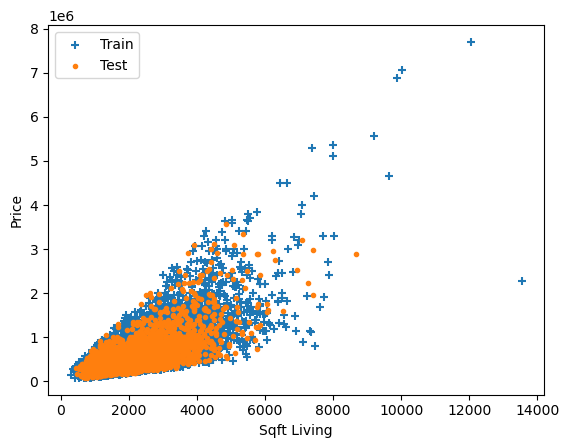

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot sqft_living vs housing price for the train and test da
plt.scatter(train_data['sqft_living'], train_data['price'], marker='+', label='Train')
plt.scatter(test_data['sqft_living'], test_data['price'], marker='.', label='Test')

# Code to customize the axis labels
plt.legend()
plt.xlabel('Sqft Living')
plt.ylabel('Price')

For this problem, we will look at using two sets of features derived from the data inputs. The basic set of features only contains a few data inputs while the advanced features contain them and more.

In [43]:
basic_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [44]:
advanced_features = basic_features + [
    'condition',      # condition of the house
    'grade',          # measure of qality of construction
    'waterfront',     # waterfront property 
    'view',           # type of view
    'sqft_above',     # square feet above ground
    'sqft_basement',  # square feet in basementab
    'yr_built',       # the year built
    'yr_renovated',   # the year renovated
    'lat',            # the longitude of the parcel
    'long',           # the latitide of the parcel
    'sqft_living15',  # average sq.ft. of 15 nearest neighbors 
    'sqft_lot15',     # average lot size of 15 nearest neighbors 
]

---
In the following cell, you should train two linear regression models
* The first should be saved in a variable called `basic_model` that only uses the basic features
* The seconod should be saved in a variable called `advanced_model` that uses the advanced features

You'll need to look through the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class from scikit-learn to look into how to train a regression model for this task. In particular, make sure you check out the `fit` function.

Notice that our goal is to eventually make a prediction of how the model will do in the future. You should keep this in mind when deciding which datasets to use where.

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#basic model
y_basic= train_data['price']
x_basic= train_data[basic_features]
regr = linear_model.LinearRegression()

basic_model= regr.fit(x_basic, y_basic)
basic_model

basic_model.coef_

NameError: name 'train_data' is not defined

In [65]:
y_complex= train_data['price']
x_complex= train_data[advanced_features]

regr = linear_model.LinearRegression()

advanced_model= regr.fit(x_complex, y_complex)
advanced_model

advanced_model.coef_

array([-3.73508629e+04,  3.98205690e+04,  1.15503472e+02,  1.37837107e-01,
        6.04555854e+03, -5.78996735e+02,  2.47229359e+04,  9.43634335e+04,
        5.60562708e+05,  5.47050868e+04,  7.36720876e+01,  4.18313847e+01,
       -2.61605236e+03,  1.42807181e+01,  6.00735492e+05, -2.15964183e+05,
        1.83111262e+01, -4.42187184e-01])

Now, we will evaluate the models' predictions to see how they perform.

---
# Root Mean Square Error (RMSE) of trained predictors

## Q5) What are your Root Mean Squared Errors (RMSE) on your training data using the basic model and the advanced model?


Use the models you trained in last section to predict what it thinks the values for the data points should be. You can look at the documentation from the `LinearRegression` model to see how to make predictions. 

The RMSE is another commonly reported metric used for regression models. The RMSE is similar to RSS but is modified slightly to scale the number down. The RMSE is defined as $$RMSE = \sqrt{\frac{1}{n}RSS}$$

where the thing inside the square root is refered to as the Mean Square Error (MSE). You will also need to use the `mean_squared_error` function from sklearn (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)) which you'll have to import as well. 

**Save your result in variables named `train_rmse_basic` and `train_rmse_advanced` respectively.**

**Remember, we want you to report the square root of the MSE numbers**.

In [90]:
advanced_model_Y_train = advanced_model.predict(train_data[advanced_features])

advanced_model_Y_train


basic_model_Y_train = basic_model.predict(train_data[basic_features])

basic_model_Y_train

train_data['adv']= advanced_model_Y_train
train_data['basic']= basic_model_Y_train

print(train_data.shape)
train_data.head()

(17290, 23)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,adv,basic
18355,8641500252,20150227T000000,403000,3,2.50,1502,1400,3.0,0,0,...,0,2005,0,98115,47.6951,-122.305,1377,1466,3.710037e+05,4.006455e+05
19725,4083306045,20141029T000000,1375000,5,3.75,3330,5042,2.0,0,2,...,860,2014,0,98103,47.6497,-122.339,1780,3990,9.268373e+05,8.791335e+05
13639,7853302110,20150406T000000,469900,3,2.50,2270,4399,2.0,0,0,...,0,2007,0,98065,47.5415,-121.884,2060,4399,3.623918e+05,6.216450e+05
18146,8106100085,20140509T000000,1702500,5,4.50,5190,23716,2.0,0,2,...,1800,1987,2000,98040,47.5846,-122.223,4460,22748,1.582231e+06,1.441855e+06
1112,1509500160,20150324T000000,350900,4,2.50,2540,12843,2.0,0,0,...,0,1992,0,98030,47.3866,-122.169,2410,9383,5.982156e+05,6.265597e+05


In [81]:
### edTest(test_train_rmse) ###

from sklearn.metrics import mean_squared_error

train_rmse_basic = mean_squared_error(train_data['price'], train_data['basic'], squared=False)
train_rmse_basic


256830.62590387545

In [84]:
train_rmse_advanced = mean_squared_error(train_data['price'], train_data['adv'], squared=False)
train_rmse_advanced

203684.37222107282

---
## Q6) What are your RMSE errors on your test data using the basic model and then the advanced model?

Similar to the last problem, but compute the test RMSE. Store your results in `test_rmse_basic` and `test_rmse_advanced`.

In [92]:
advanced_model_Y_test = advanced_model.predict(test_data[advanced_features])

advanced_model_Y_test

basic_model_Y_test = basic_model.predict(test_data[basic_features])

basic_model_Y_test

test_data['adv']= advanced_model_Y_test
test_data['basic']= basic_model_Y_test


print(test_data.shape)

test_data.head()


(4323, 23)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,adv,basic
5146,2780700050,20141106T000000,432000,3,2.5,1920,9812,2.0,0,0,...,0,2000,0,98028,47.7633,-122.243,1830,10534,634874.999213,486455.306499
20917,6762700452,20140613T000000,575000,3,3.0,1384,1287,2.0,0,0,...,240,2006,0,98102,47.6295,-122.320,1570,1288,421606.684173,365272.988447
15792,4027700795,20150318T000000,268300,3,1.0,1190,9000,1.0,0,0,...,0,1968,0,98028,47.7700,-122.264,1960,7200,432653.620766,240482.009429
3260,9842300485,20150311T000000,380000,2,1.0,1040,7372,1.0,0,0,...,200,1939,0,98126,47.5285,-122.378,1930,5150,383504.765990,308170.043932
15217,1023059108,20150430T000000,390000,2,1.0,670,11505,1.0,0,0,...,0,2003,0,98059,47.4990,-122.157,2180,11505,-110041.777746,149710.559114


In [93]:
### edTest(test_test_rmse) ###

test_rmse_basic = mean_squared_error(test_data['price'], test_data['basic'], squared=False)
test_rmse_basic


250891.0905675471

In [94]:
test_rmse_advanced = mean_squared_error(test_data['price'], test_data['adv'], squared=False)
test_rmse_advanced

191028.34186715388

---
## Q7) Which model would you choose and why?
These questions do not need any code to answer them. Instead, save a variable with the specified name with a string of the specified option.


### Q7.1) Which model would you choose?

Ignore the fact that we do not have a validation set for this assignment (we will get to that in the next assignment). Which model do you think would perform better in the future?

* a) Model with the basic features
* b) Model with the advanced features

Save your result in a variable named `q7_1`. For example, if your anwer is option a, write 

```
q7_1 = 'a'
```


In [ ]:
### edTest(test_q7_1) ###

q7_1 = 'b'

### Q7.2) Why?

Same as before, select on one option to describe why you would select the model in the previous question. Save your result as a string in a variable named `q7_2`.

* a) It has higher training error
* b) It uses more features
* c) It has lower test error
* d) It has lower training error
* e) It has higher test error

In [ ]:
### edTest(test_q7_2) ###

q7_2 = 'c'

# Concept Portion
Make sure you also complete the concept portion of this assignment before the due date.

> Copyright ©2020 Emily Fox and Hunter Schafer.  All rights reserved.  Permission is hereby granted to students registered for University of Washington CSE/STAT 416 for use solely during Autumn Quarter 2021 for purposes of the course.  No other use, copying, distribution, or modification is permitted without prior written consent. Copyrights for third-party components of this work must be honored.  Instructors interested in reusing these course materials should contact the author.